In [71]:
import pandas as pd
import matplotlib.pyplot as plt


## Data import and cleaning

In [57]:
# import csv to dataframe and inspect
adderall_df = pd.read_csv('Resources/adderall.csv')
adderall_df

,Age,Condition,Date,Drug,Sex,Reviews
0,,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,,No Script or health Insurance needed to place ...
1,25-34,Attention Deficit Disorder with Hyperactivity,2023-01-07,adderall xr,Female,I realize my previous comment was more about m...
2,25-34,Other,2023-01-30,adderall xr,Female,I realize my previous comment was more about m...
3,25-34,Attention Deficit Disorder with Hyperactivity,2023-03-08,adderall xr,Female,"My entire life I felt like I was different, ne..."
4,25-34,Attention Deficit Disorder with Hyperactivity,2023-06-09,adderall xr,Female,Been taking it since I was 10. So over 20 year...
...,...,...,...,...,...,...
505,25-34,Attention Deficit Disorder with Hyperactivity,2023-04-11,adderall xr,Female,The only problem I had: it would quit working ...
506,19-24,Attention Deficit Disorder with Hyperactivity,2023-01-20,adderall xr,Male,"I have a urine test in a few days, and I wante..."
507,45-54,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,Female,"I have ADD, not ADHD. I noticed a difference ..."
508,35-44,Attention Deficit Disorder with Hyperactivity,2023-05-03,adderall xr,Female,"I can sleep at night, but I do't need naps dur..."


In [58]:
# Check for nulls
adderall_df.isnull().sum()

Age          0
Condition    0
Date         0
Drug         0
Sex          0
Reviews      0
dtype: int64

In [59]:
# List unique values for relevant columns to find anomalies and for later analysis
adderall_df.Age.unique()

array([' ', '25-34', '35-44', '65-74', '55-64', '13-18', '19-24', '45-54',
       '7-12', '3-6', '75 or over'], dtype=object)

In [60]:
adderall_df.Condition.unique()

array(['Attention Deficit Disorder with Hyperactivity', 'Other',
       'Recurring Sleep Episodes During the Day'], dtype=object)

In [61]:
adderall_df.Sex.unique()

array([' ', 'Female', 'Male'], dtype=object)

In [62]:
# 'Age' and 'Sex' appear to have a space entered in some rows rather than a null. 
# Drop rows where 'Age' or 'Sex' have value ' '.

adderall_df = adderall_df[(adderall_df['Age'] != ' ') & (adderall_df['Sex'] != ' ')]

In [63]:
# Rename 'Age' values '3-6' and '7-12' with leading zeros to simplify ordering in later plotting
adderall_df['Age'] = adderall_df['Age'].str.replace('3-6', '03-06').str.replace('7-12', '07-12')

/Users/jim/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Sentiment analysis

In [27]:
# import sentiment model
from transformers import pipeline
model_path = "LiYuan/amazon-review-sentiment-analysis"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [64]:
# Define a function to analyze sentiment using the provided model and calculate the average score
def analyze_sentiment(text):
    # Truncate or split text to fit within the model's maximum sequence length
    max_sequence_length = 512  # Adjust based on model's limit
    text_segments = [text[i:i + max_sequence_length] for i in range(0, len(text), max_sequence_length)]
    
    # Analyze sentiment for each text segment and collect the scores
    sentiment_scores = [sentiment_task(segment)[0]['score'] for segment in text_segments]
    
    # Calculate the average score
    if sentiment_scores:
        average_score = sum(sentiment_scores) / len(sentiment_scores)
    else:
        average_score = None  # Set a default value if there are no scores
    
    return average_score

In [65]:
# Add a new 'Sentiment_Score' column to the DataFrame
adderall_df['Sentiment_Score'] = adderall_df['Reviews'].apply(analyze_sentiment)

/Users/jim/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
adderall_df.head()

,Age,Condition,Date,Drug,Sex,Reviews,Sentiment_Score
1,25-34,Attention Deficit Disorder with Hyperactivity,2023-01-07,adderall xr,Female,I realize my previous comment was more about m...,0.434158
2,25-34,Other,2023-01-30,adderall xr,Female,I realize my previous comment was more about m...,0.548601
3,25-34,Attention Deficit Disorder with Hyperactivity,2023-03-08,adderall xr,Female,"My entire life I felt like I was different, ne...",0.592201
4,25-34,Attention Deficit Disorder with Hyperactivity,2023-06-09,adderall xr,Female,Been taking it since I was 10. So over 20 year...,0.887674
5,25-34,Recurring Sleep Episodes During the Day,2023-02-21,adderall xr,Male,No Script or health Insurance needed to place ...,0.373046


## Data analysis

In [69]:
# Group by age and sex
adderall_agesex = adderall_df.groupby(['Age', 'Sex'])['Sentiment_Score'].mean().reset_index()
adderall_agesex

,Age,Sex,Sentiment_Score
0,03-06,Female,0.376358
1,03-06,Male,0.649254
2,07-12,Female,0.589405
3,07-12,Male,0.535889
4,13-18,Female,0.604527
5,13-18,Male,0.594612
6,19-24,Female,0.597583
7,19-24,Male,0.571332
8,25-34,Female,0.612097
9,25-34,Male,0.577380


In [70]:
# Split by sex
adderall_male = adderall_agesex[adderall_agesex['Sex']=='Male']
adderall_female = adderall_agesex[adderall_agesex['Sex']=='Female']

<AxesSubplot:title={'center':'Adderall Sentiment by Age and Sex'}, xlabel='Age', ylabel='Sentiment'>

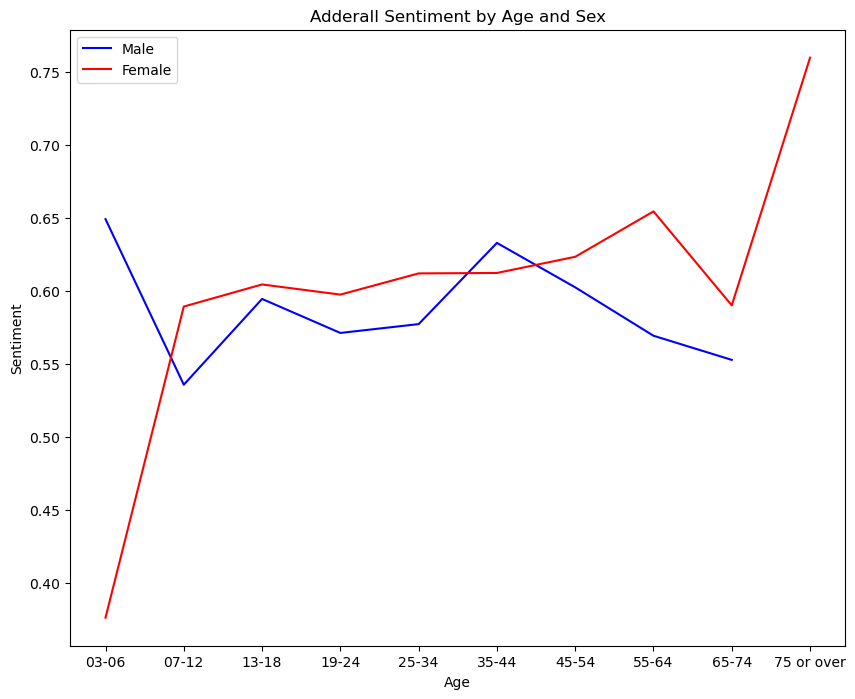

In [75]:
# Plot sentiment by age for each sex

fig, ax = plt.subplots(figsize=(10, 8))
adderall_male.plot.line(x='Age', y='Sentiment_Score', ylabel='Sentiment', c='blue', label='Male',
                        ax=ax, title='Adderall Sentiment by Age and Sex') 
adderall_female.plot.line(x='Age', y='Sentiment_Score', c='red', label='Female', ax=ax)


In [7]:
def map_age_to_category(age):
    if age in ['3-6', '7-12']:
        return 'child'
    elif age in '13-18':
        return 'adolescent'
    elif age in ['19-24', '25-34', '35-44', '45-54', '55-64']:
        return 'adult'
    elif age in ['65-74', '75 or over']:
        return 'senior'
    else:
        return 'unknown'



In [8]:
adderall_df['Age_Range'] = adderall_df['Age'].apply(map_age_to_category)
adderall_df

,Age,Condition,Date,Drug,Sex,Reviews,sentiment,Age_Range
0,,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,,No Script or health Insurance needed to place ...,1,unknown
1,25-34,Attention Deficit Disorder with Hyperactivity,2023-01-07,adderall xr,Female,I realize my previous comment was more about m...,1,adult
2,25-34,Other,2023-01-30,adderall xr,Female,I realize my previous comment was more about m...,1,adult
3,25-34,Attention Deficit Disorder with Hyperactivity,2023-03-08,adderall xr,Female,"My entire life I felt like I was different, ne...",1,adult
4,25-34,Attention Deficit Disorder with Hyperactivity,2023-06-09,adderall xr,Female,Been taking it since I was 10. So over 20 year...,1,adult
...,...,...,...,...,...,...,...,...
505,25-34,Attention Deficit Disorder with Hyperactivity,2023-04-11,adderall xr,Female,The only problem I had: it would quit working ...,1,adult
506,19-24,Attention Deficit Disorder with Hyperactivity,2023-01-20,adderall xr,Male,"I have a urine test in a few days, and I wante...",1,adult
507,45-54,Attention Deficit Disorder with Hyperactivity,2023-04-29,adderall xr,Female,"I have ADD, not ADHD. I noticed a difference ...",1,adult
508,35-44,Attention Deficit Disorder with Hyperactivity,2023-05-03,adderall xr,Female,"I can sleep at night, but I do't need naps dur...",1,adult


In [14]:
adderall_sentiment_by_age = adderall_df['sentiment'].groupby('age').mean()
adderall_sentiment_by_age

KeyError: 'sentiment'

In [16]:
# Assuming you already have the 'Age' and 'Sex' columns in your DataFrame

# Group by 'Age' and 'Sex', and calculate the mean sentiment for each group
result = adderall_df.groupby(['Age', 'Sex'])['sentiment'].mean().reset_index()
result

,Age,Sex,sentiment
0,,,1.0
1,,Female,1.0
2,,Male,1.0
3,13-18,,1.0
4,13-18,Female,1.0
5,13-18,Male,1.0
6,19-24,,1.0
7,19-24,Female,1.0
8,19-24,Male,1.0
9,25-34,,1.0


In [25]:
# Define a function to analyze sentiment using the provided model
def analyze_sentiment(text):
    # Truncate or split text to fit within the model's maximum sequence length
    max_sequence_length = 512  # Adjust based on model's limit
    text_segments = [text[i:i + max_sequence_length] for i in range(0, len(text), max_sequence_length)]
    
    # Analyze sentiment for each text segment and concatenate the results
    sentiment_results = [sentiment_task(segment)[0]['label'] for segment in text_segments]
    sentiment = ' '.join(sentiment_results)

    return sentiment

# Add a new 'Sentiment' column to the DataFrame
adderall_df['Sentiment'] = adderall_df['Reviews'].apply(analyze_sentiment)


KeyboardInterrupt: 

In [21]:
adderall_df['Sentiment'].value_counts()

5 stars                           176
5 stars 5 stars                    58
1 star                             56
4 stars                            34
3 stars                            24
                                 ... 
2 stars 5 stars 5 stars 1 star      1
1 star 4 stars 4 stars              1
4 stars 5 stars 5 stars             1
5 stars 1 star 3 stars              1
1 star 5 stars 5 stars              1
Name: Sentiment, Length: 68, dtype: int64